<a href="https://colab.research.google.com/github/EloiMolla/SSN/blob/main/Homework2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

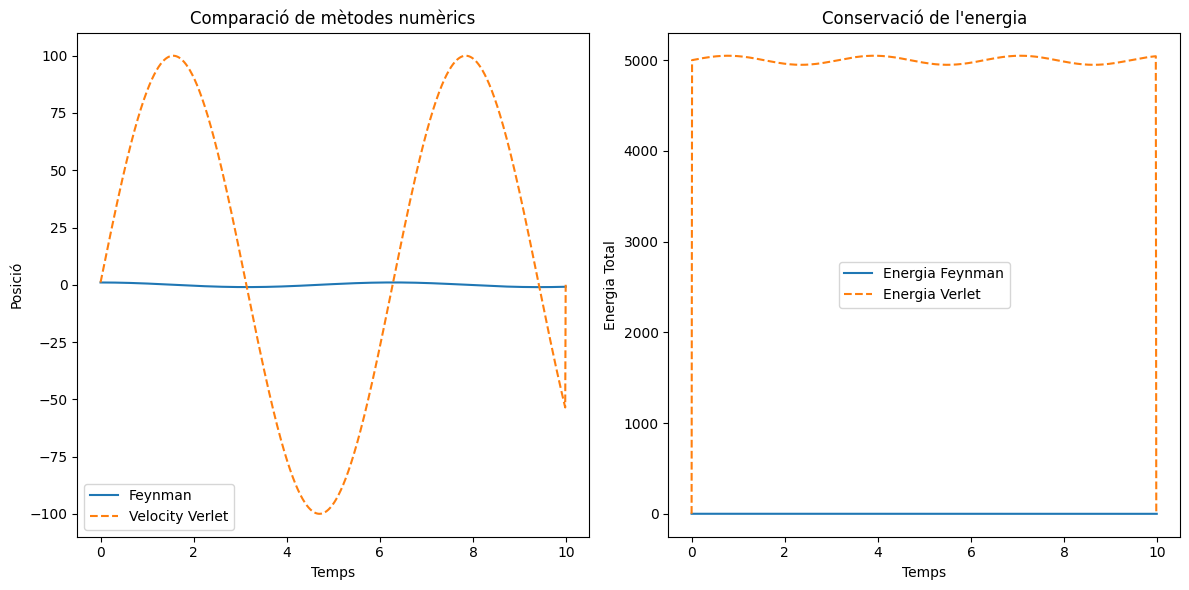

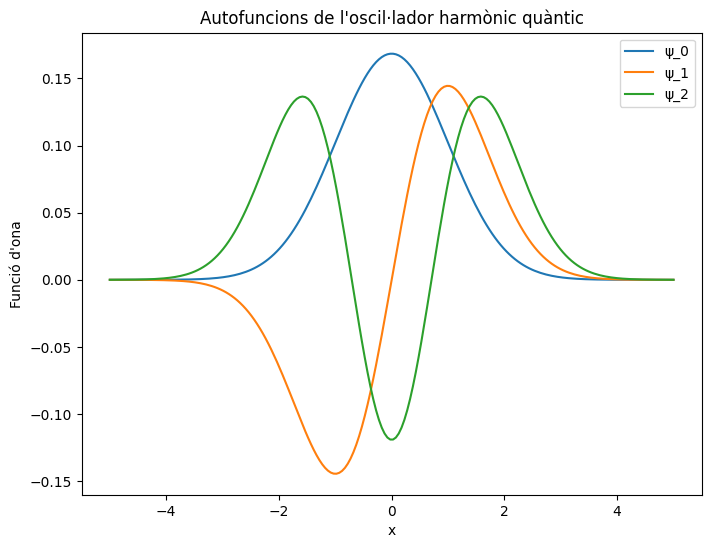

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import eigh_tridiagonal

# Constants
m = 1.0   # Massa
k = 1.0   # Constant del ressort
dt = 0.01 # Pas de temps
N = 1000  # Nombre de passos de simulació

# Funció de la força
def force(x):
    return -k * x

# Funció de l'energia total
def energia_total(x, v):
    return 0.5 * m * v**2 + 0.5 * k * x**2

# Inicialització de vectors per Feynman
x_feynman = np.zeros(N)
v_feynman = np.zeros(N)
x_feynman[0] = 1.0  # Posició inicial
v_feynman[0] = 0.0  # Velocitat inicial
energia_feynman = np.zeros(N)

# Inicialització de vectors per Verlet
x_verlet = np.zeros(N)
v_verlet = np.zeros(N)
x_verlet[0] = 1.0
v_verlet[0] = 0.0
energia_verlet = np.zeros(N)

# Pas extra per Verlet
x_verlet[1] = x_verlet[0] + v_verlet[0] * dt + 0.5 * (force(x_verlet[0]) / m) * dt**2

# Integració numèrica
for i in range(N - 1):
    # Mètode de Feynman
    a_f = force(x_feynman[i]) / m
    x_feynman[i + 1] = x_feynman[i] + v_feynman[i] * dt + 0.5 * a_f * dt**2
    v_feynman[i + 1] = v_feynman[i] + a_f * dt
    energia_feynman[i] = energia_total(x_feynman[i], v_feynman[i])

    # Mètode de Velocity Verlet
    if i < N - 2:  # Per evitar errors en l'últim pas
        a_v = force(x_verlet[i]) / m
        x_verlet[i + 1] = 2 * x_verlet[i] - x_verlet[i - 1] + a_v * dt**2
        v_verlet[i + 1] = (x_verlet[i + 1] - x_verlet[i - 1]) / (2 * dt)
        energia_verlet[i] = energia_total(x_verlet[i], v_verlet[i])

# Resolució de l'equació de Schrödinger en unitats atòmiques
N_grid = 200
x_grid = np.linspace(-5, 5, N_grid)
dx = x_grid[1] - x_grid[0]

V = 0.5 * x_grid**2  # Potencial harmònic
T_diag = np.full(N_grid, 1/dx**2)
T_offdiag = np.full(N_grid-1, -0.5/dx**2)

# Resolució dels autovalors i autovectors
energies, wavefunctions = eigh_tridiagonal(T_diag + V, T_offdiag)

# Plots
plt.figure(figsize=(12,6))
plt.subplot(1, 2, 1)
plt.plot(np.arange(N) * dt, x_feynman, label='Feynman')
plt.plot(np.arange(N) * dt, x_verlet, label='Velocity Verlet', linestyle='dashed')
plt.xlabel("Temps")
plt.ylabel("Posició")
plt.legend()
plt.title("Comparació de mètodes numèrics")

plt.subplot(1, 2, 2)
plt.plot(np.arange(N) * dt, energia_feynman, label='Energia Feynman')
plt.plot(np.arange(N) * dt, energia_verlet, label='Energia Verlet', linestyle='dashed')
plt.xlabel("Temps")
plt.ylabel("Energia Total")
plt.legend()
plt.title("Conservació de l'energia")

plt.tight_layout()
plt.show()

# Plots de les funcions pròpies de Schrödinger
plt.figure(figsize=(8,6))
for i in range(3):
    plt.plot(x_grid, wavefunctions[:, i], label=f'ψ_{i}')
plt.xlabel("x")
plt.ylabel("Funció d'ona")
plt.title("Autofuncions de l'oscil·lador harmònic quàntic")
plt.legend()
plt.show()
